In [1]:
# The code was removed by DSX for sharing.

In [2]:
import requests, StringIO, json

def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containg the file content 
    from the associated Bluemix Object Storage V3."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 32, 30, 30)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 32, 30, 30)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 28, 28)    9248        dropout_3[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 14, 14)    0           convolution2d_4[0][0]            
___________________________________________________________________________________________

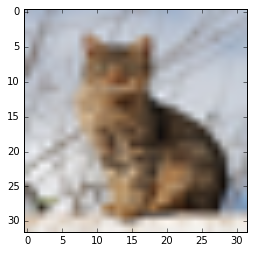

Activaciones en la capa de salida: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   9.33841685e-11
    0.00000000e+00   0.00000000e+00]]
Clase predicha: 3


In [4]:
# Simple CNN model for CIFAR-10
import numpy
import PIL
from PIL import Image
%matplotlib inline
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Open file
img = Image.open(get_file_content(credentials_2))
img = img.resize((32,32), PIL.Image.ANTIALIAS)

# Convert to numpy array and adjust axis order and dimensions 
img = numpy.asarray(img)
img = numpy.rollaxis(img,2)
img = numpy.reshape(img,[3, 32, 32])

# Show image
pyplot.imshow(toimage(img))
pyplot.show()

# Get predictions
img = numpy.reshape(img,[1, 3, 32, 32])
print "Activaciones en la capa de salida:", model.predict(img, batch_size=1, verbose = 0)
print "Clase predicha:", model.predict_classes(img, batch_size=1, verbose = 0)[0]